In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score, silhouette_score
from sklearn.preprocessing import StandardScaler
!pip install networkx matplotlib
#!pip install python-igraph
#!pip install cairocffi
!pip install markov-clustering
import networkx as nx
import markov_clustering as mc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Create the demanded dataframe:

In [3]:
#Load "active_user" CSV file
file_path1 = '/content/drive/MyDrive/data/'
active_user_df = pd.read_csv(file_path1+'active_users_from_Australia.csv')

In [ ]:
active_user_df.head()

,Unnamed: 0,Australia
0,0,2768501
1,1,1092378031
2,2,74382140
3,3,606571099
4,4,16675569


In this practical work, we want to find the top 5 nearest neighbors of each users found in the list of users.   
For this we want to look at two main strategies
- In the first case, we are going to use raw features.
- In the second case, we are going to encode user behaviors.

# First Case-Raw data
1. From data collected from Australia
2. Build a single dataframe. Indexes should be user ID, whereas columns should
be the different days. Values within each cell of the dataframe should be the
sentiment she/he presented.
3. For each user find the top 5 nearest neighbor to her/him.
4. Build the 5-nearest neighbor graph (exploit networkx library or igraph library
to plot your graph).
5. Using the Markov clustering algorithm (already given in igraph) identify your
clusters of users.
6. Give an interpretation to your result.

In [ ]:
#Extract user IDs
user_ids = active_user_df["Australia"].tolist()
len(user_ids)

114

In [ ]:
#Create an empty DataFrame
result_df = pd.DataFrame({"user_id": user_ids})

In [ ]:
#Iterate over daily data files
start_date = pd.to_datetime("2020-03-01")
end_date = pd.to_datetime("2021-08-31")
date_range = pd.date_range(start=start_date, end=end_date, freq="D")

In [ ]:
# Create empty dictionary to store daily sentiment data
sentiment_data = {}

for date in date_range:
    # Load daily data file
    file_path = f"/content/drive/MyDrive/data/daily_sentiments/Users_from_Australia_information_{date.strftime('%Y-%m-%d')}.csv"
    if os.path.exists(file_path):
        daily_data_df = pd.read_csv(file_path)
        # Filter data for active users
        filtered_df = daily_data_df[daily_data_df["user_id"].isin(user_ids)].copy()

        # Add sentiment data to the dictionary
        sentiment_data[date.strftime("%Y-%m-%d")] = filtered_df.set_index("user_id")["sentiment"]

In [ ]:
# Create the final DataFrame with user IDs and daily sentiment columns
for date, sentiment_series in sentiment_data.items():
    result_df[date] = sentiment_series

# Print the final DataFrame
result_df.head()

,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2021-08-22,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31
user_id,,,,,,,,,,,,,,,,,,,,,
2768501,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0
1092378031,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74382140,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0
606571099,-1.0,NaN,1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
16675569,0.0,-1.0,-1.0,1.0,-1.0,NaN,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Read csv
Out put the demanded dataframe to a csv file

In [ ]:
#result_df.to_csv(file_path1+"result.csv", index=True)

Check the csv file,it does contained the user_id and everyday's sentiment in different columns.

In [4]:
file_path1 = '/content/drive/MyDrive/data/'
result_df= pd.read_csv(file_path1+'result.csv')
result_df.head()

,user_id,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,...,2021-08-22,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31
0,2768501,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0
1,1092378031,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,74382140,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0
3,606571099,-1.0,NaN,1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
4,16675569,0.0,-1.0,-1.0,1.0,-1.0,NaN,-1.0,-1.0,-1.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now I want to find the top 5 nearest neighbor to her/him.   
And build the 5-nearest neighbor graph (exploit networkx library or igraph library to plot your graph).  
I chose to use Pearson correlation to find the similarities between users.
## Pearson correlation

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
import networkx as nx
import matplotlib.pyplot as plt


In [6]:
#Load the DataFrame with sentiment values:
file_path1 = '/content/drive/MyDrive/data/'
result_df = pd.read_csv(file_path1+"result.csv")
#Extract the user IDs and sentiment values:
user_ids = result_df["user_id"].tolist()
sentiment_values = result_df.iloc[:, 1:].values

As the example in class, I just filled the missing value(NaN) by 0,which means these missing field would not be counted

In [7]:
# Fill missing values with 0
sentiment_values = np.nan_to_num(sentiment_values, nan=0.0)

In [8]:
#Calculate pairwise Pearson correlation:
pearson_corr = np.corrcoef(sentiment_values)
#Find the top 5 nearest neighbors for each user based on Pearson correlation:
pearson_neighbors = np.argsort(pearson_corr, axis=1)[:, -6:-1][:, ::-1]

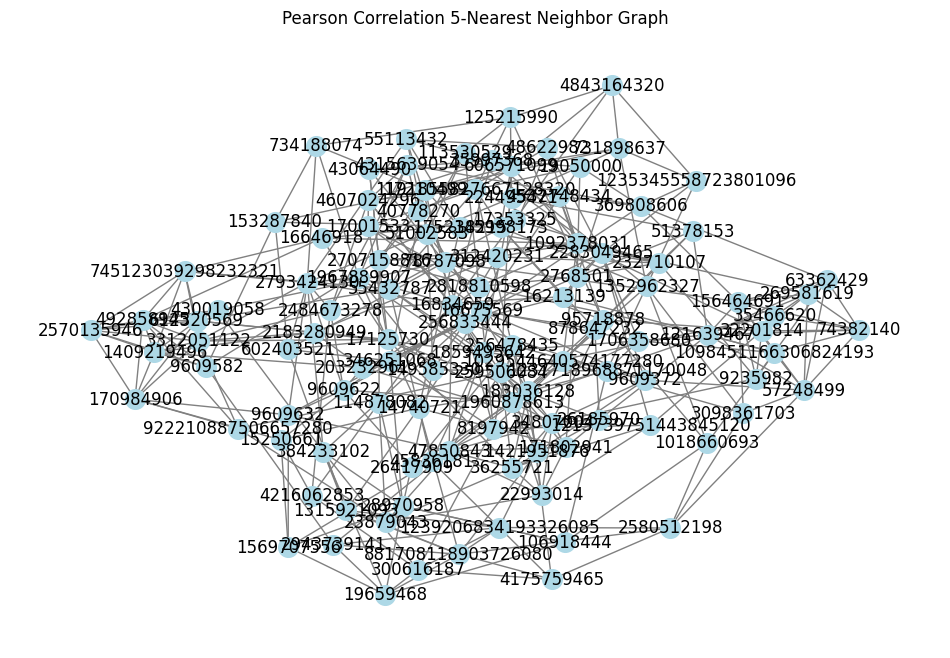

In [9]:
pearson_graph = nx.Graph()

for i, user_id in enumerate(user_ids):
    pearson_nn_ids = [user_ids[j] for j in pearson_neighbors[i]]
    
    pearson_graph.add_node(user_id)
    
    for nn_id in pearson_nn_ids:
        pearson_graph.add_edge(user_id, nn_id, weight=1.0)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(pearson_graph)
nx.draw_networkx(pearson_graph, pos, node_size=200, node_color='lightblue', edge_color='gray', with_labels=True)
plt.title("Pearson Correlation 5-Nearest Neighbor Graph")
plt.axis('off')
plt.show()


In [24]:
# compute the adj_matrix_1
adj_matrix_1 = nx.to_numpy_array(pearson_graph)

In [25]:
from markov_clustering import run_mcl, get_clusters
from scipy.sparse import csr_matrix
from scipy.sparse import find
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score

# Perform Markov clustering
result = run_mcl(adj_matrix_1)

# Obtain the clusters
clusters_1 = get_clusters(result)

# Flatten the clusters into a single list of labels
labels = []
for i, cluster in enumerate(clusters_1):
    labels.extend([i] * len(cluster))

# Compute the silhouette score
adj_matrix_dense = np.array(adj_matrix_1)
silhouette_1 = silhouette_score(adj_matrix_dense, labels)

print("Silhouette Score 1:", silhouette_1)

# Print the users in each cluster
for i, cluster in enumerate(clusters_1):
    print(f"Cluster {i+1}:")
    cluster_users = [user_ids[node] for node in cluster]
    print(cluster_users)
    print()


Silhouette Score 1: -0.1110326858327486
Cluster 1:
[2768501, 1239206834193326085]

Cluster 2:
[1092378031, 74382140, 2943739141]

Cluster 3:
[606571099]

Cluster 4:
[16675569]

Cluster 5:
[156464691, 183036128, 19050000, 34807004, 384233102, 17001533, 4607024296, 9609582, 16646918]

Cluster 6:
[16834659, 121639467, 175238215]

Cluster 7:
[2283049465]

Cluster 8:
[63362429, 57248499, 125215990, 22993014, 369808606, 15250661, 36255721, 492858945, 1029544640574177280, 17210499, 153287840]

Cluster 9:
[269581619, 8197942, 4175759465, 114878082]

Cluster 10:
[32201814]

Cluster 11:
[149585330, 346251068, 312420231, 731898637]

Cluster 12:
[2818810598]

Cluster 13:
[78787098, 2707158816]

Cluster 14:
[259506084, 3098361703]

Cluster 15:
[43064490, 1235345558723801096, 55432787, 14740721, 4216062853, 16213139]

Cluster 16:
[171802941, 9235982, 19659468]

Cluster 17:
[40778270, 35466620]

Cluster 18:
[1098451166306824193]

Cluster 19:
[55113432, 26185970]

Cluster 20:
[256833444]

Cluster 21:


Interpreting the clustering results based on Pearson correlation：
This result identified users who have similar patterns or trends in their sentiment scores over our specified time period.

## Encoding:   
- Over the constructed dataframe, you are asked to perform a UMAP
transformation in a 2-dimensional space.
- Give an interpretation to the obtained projections.
- As in the previous step, build the 5-nearest neighbor graph and run the
Markov clustering algorithm.
- With respect to the silhouette score, compare the two clustering cases.

In [26]:
!pip install umap-learn
import umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=62d8171666984281708ec66be2161ee78783ad3e2fb97660c665efb90dd7b47d
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=4c0512432e11362ee61c2dd636236dce47ad0d0264e493e9a6670e4c2ce810de
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


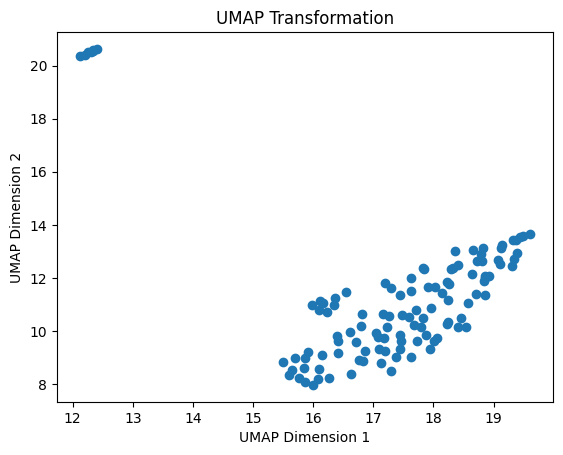

In [27]:
#Create an instance of the UMAP transformer and specify the desired number of dimensions (in this case, 2):
umap_transformer = umap.UMAP(n_components=2)
# Replace NaN values with 0
df_filled = result_df.fillna(0)
# Extract the sentiment columns
sentiment_columns = df_filled.columns[1:]  # the first column is the user_id column
# Perform UMAP transformation
umap_embedding = umap_transformer.fit_transform(df_filled[sentiment_columns])

# Create a scatter plot
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1])

# Add labels and title
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Transformation')

# Show the plot
plt.show()


The obtained projections from the UMAP transformation can be interpreted as a visualization of the similarity or dissimilarity between the users based on their everyday sentiment scores. The scatter plot allows us to observe the distribution and clustering of the data points in a two-dimensional space.

1. Clustering: We can't see distinct groups of data points in the scatter plot.
2. Outliers:We saw data points that appear isolated or far away from the main clusters in the scatter plot which represent outliers. These outliers may indicate users with unique sentiment patterns that differ significantly from the majority of users.

In [28]:
from scipy.sparse import csr_matrix
# Calculate pairwise distances between data points
distances_2 = np.linalg.norm(umap_embedding[:, np.newaxis] - umap_embedding, axis=2)

# Build the 5-nearest neighbor graph
graph = nx.Graph()
for i, d in enumerate(distances_2):
    nearest_indices = np.argsort(d)[1:6]  # Exclude self, take 5 nearest neighbors
    graph.add_edges_from([(i, n) for n in nearest_indices])

# Convert the graph to a sparse matrix
matrix = csr_matrix(nx.adjacency_matrix(graph))
# Run the Markov clustering algorithm
result = mc.run_mcl(matrix)  # Run MCL algorithm
clusters_2 = mc.get_clusters(result)  # Get clusters
# Create a dictionary to map indices to user IDs
index_to_user = {i: user_id for i, user_id in enumerate(user_ids)}

# Print the clusters with user IDs
for i, cluster in enumerate(clusters_2):
    user_cluster = [index_to_user[index] for index in cluster]
    print(f"Cluster {i + 1}: {user_cluster}")

Cluster 1: [2768501, 1092378031, 606571099, 156464691]
Cluster 2: [74382140, 8197942, 183036128, 149585330, 78787098, 19050000, 1235345558723801096, 171802941, 40778270, 19659468, 4532748434]
Cluster 3: [16675569, 16834659, 2283049465, 63362429, 121639467, 32201814, 1098451166306824193]
Cluster 4: [57248499, 125215990, 22993014, 369808606, 15250661]
Cluster 5: [269581619, 2818810598, 2707158816, 36255721, 259506084, 43064490]
Cluster 6: [55113432, 9235982, 9609372, 1237718968871170048, 612320569, 1859495642, 35997368]
Cluster 7: [346251068, 312420231, 881708118903726080, 51378153, 55432787, 1569707556, 9609622, 2793424130, 1960878613, 2183280949, 4843164320, 602403521, 48622982, 430019058]
Cluster 8: [34807004, 384233102, 35466620, 17001533, 256833444, 17125730, 113530529, 14740721, 145998173]
Cluster 9: [26185970, 232710107, 1409219496, 745123039298232321, 9609632, 3312051122, 922210887506657280]
Cluster 10: [492858945, 4607024296, 170984906, 2570135946, 23879043, 734188074, 47850843,

In [29]:
from sklearn.metrics import silhouette_score

# Flatten the clusters into a single list of labels
labels = [cluster_id for cluster_id, cluster in enumerate(clusters_2) for _ in cluster]

# Calculate the silhouette score
silhouette_2 = silhouette_score(umap_embedding, labels)
print("Silhouette Score_2:", silhouette_2)


Silhouette Score_2: -0.37511998


In [30]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import itertools

# Calculate pairwise distances between data points
cluster_distances_2 = pdist(umap_embedding)

# Convert the distances to a square distance matrix
distance_matrix_2 = squareform(cluster_distances_2)

# Create an empty dataframe to store the distances
df_distances_2 = pd.DataFrame(columns=['user_id1', 'user_id2', 'distance'])

# Iterate over the clusters
for cluster in clusters_2:
    # Get the user IDs in the current cluster
    users = [user_ids[i] for i in cluster]
    
    # Generate all pairwise combinations of user IDs in the cluster
    combinations = pd.DataFrame(list(itertools.product(users, users)), columns=['user_id1', 'user_id2'])
    
    # Calculate the distances between the user pairs
    cluster_distances_2 = distance_matrix_2[np.ix_(cluster, cluster)].reshape(-1, 1)
    
    # Create a dataframe for the distances in the current cluster
    df_cluster_2 = pd.DataFrame(data=combinations, columns=['user_id1', 'user_id2'])
    df_cluster_2['distance'] = cluster_distances_2
    
    # Append the cluster dataframe to the main dataframe
    df_distances_2 = pd.concat([df_distances_2, df_cluster_2], ignore_index=True)

# Convert the distance column to numeric
df_distances_2['distance'] = pd.to_numeric(df_distances_2['distance'])

# Print the dataframe
print(df_distances_2.head())


     user_id1    user_id2  distance
0     2768501     2768501  0.000000
1     2768501  1092378031  0.614490
2     2768501   606571099  0.345528
3     2768501   156464691  0.729710
4  1092378031     2768501  0.614490


In [32]:
print("Silhouette Score - Clusters_1:", silhouette_1)
print("Silhouette Score - Clusters_2:", silhouette_2)


Silhouette Score - Clusters_1: -0.1110326858327486
Silhouette Score - Clusters_2: -0.37511998


In [33]:
#df_distances_2.to_csv(file_path1+"df_distances_2.csv", index=True)

The silhouette score is a measure of how well the data points within each cluster are separated from each other and how well they are assigned to their respective clusters. The score ranges from -1 to 1, where a higher score indicates better clustering.

In our case, the silhouette scores for Clusters_1 and Clusters_2 are -0.111 and -0.375, respectively. These scores indicate that the clustering results are not very good, as they are both negative and closer to -1.

- A score close to 1 indicates that the data points are well-clustered and properly assigned to their respective clusters.
- A score close to 0 suggests overlapping or ambiguous clusters, where the data points may not be clearly separated or assigned.
- A score close to -1 indicates that the data points are likely assigned to the wrong clusters.

To improve the clustering results and increase the silhouette score, we can consider the following approaches:
Parameter Tuning /Feature Selection or Engineering/Algorithm SelectionIterative Refinement

Also it could be better if we try cosine corelation or Lp Norm,etc to calculate the distance.